In [62]:
# In this project I will go through a movies.csv file. I will familiarize myself with the data before I clean it, and then
# I will create visuals of the correlation between variables. 
# The goal of this project is to get familiar with python syntax, functions, clean data, make visuals, and share results.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust config of plots we will make 

df = pd.read_csv(r'C:\Users\Ajmal\Downloads\movies.csv')

In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [64]:
# cleaning data by removing rows with NULL values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
df = df.dropna()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [65]:
# Changing some datatypes to have the dataframe look cleaner

df['votes'] = df['votes'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [67]:
# Converting released column into a string and then expanding the year substring into a new column. 
df['released'] = df['released'].astype('string')

In [68]:
newdf = df['released'].str.split(" ", n=3, expand=True)
newdf.rename(columns = {0:"month", 1:"day", 2:"year", 3:"country"}, inplace = True)

df['released'] = newdf['year']

In [76]:
# Sorting the dataframe by the gross column in decending value

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [57]:
pd.set_option('display.max_rows', None)

In [135]:
# Droping any duplicate movies

df['name'] = df['name'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386.0,5,0,2009,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388.0,5,0,2019,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909.0,5,6,1997,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643.0,5,0,2015,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389.0,5,0,2018,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


<function matplotlib.pyplot.show(close=None, block=None)>

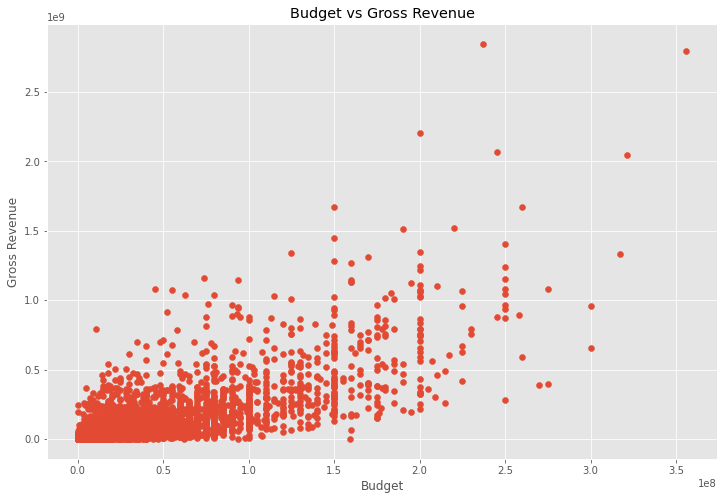

In [81]:
# Figuring out which columns are most correlated to gross revenue.
# First, I'll create scatter plots to find this relationship.


plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show

Text(0.5, 1.0, 'Budget vs Gross Revenue Correlation')

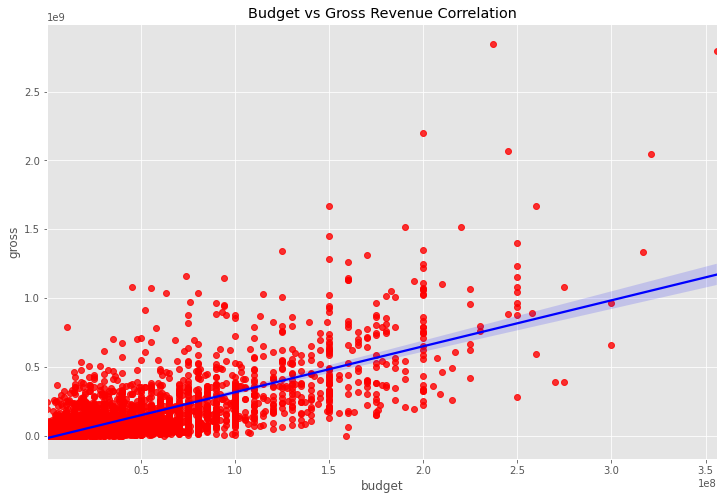

In [143]:
# Plot the Budget vs Gross using Seaborn 
# This plot shows a positive correlation between budget and gross variables indicated by the positive slope of the blue line.

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color": "red"},
            line_kws={"color": "blue"}).set_title('Budget vs Gross Revenue Correlation')


In [89]:
# It seems that there is a high correlation between Budget and gross revenue.

df.corr(method = 'pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(87.0, 0.5, 'Movie Variables')

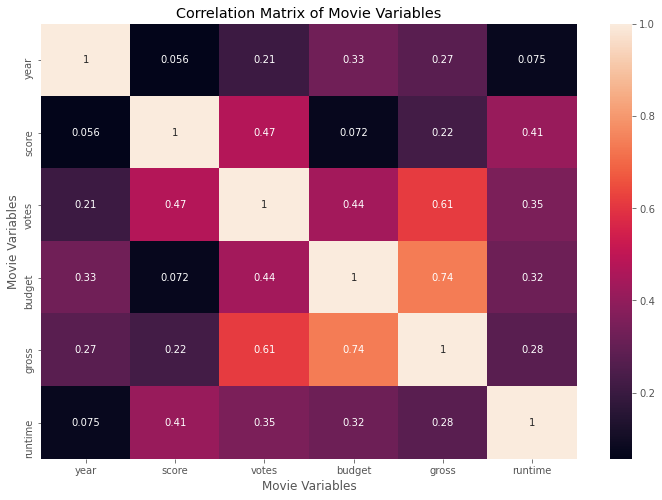

In [95]:
# Visualization of the correlation using the Pearson method.
# The brighter the square, the higher the correlation

correlation_matrix = df.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Movie Variables')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

In [97]:
# To get a more detailed look at the correlation of the variables, I will first have to convert the object datatype columns
# into category datatypes.

df.dtypes

name         object
rating       object
genre        object
year          int64
released     string
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [136]:
# I'll take the dataframe and assign numbers to the columns that I'm converting to category such as name, rating
# genre, director, writer, star, country and company. These are the variables that I will look at to see if there is a 
# correlation between them. I will save this new randomized number assignments to a variable called df_numerized. 
# Objects that are the same, such as a score or country, will get the same number assigned to it. 
# I will then take this new numerized dataframe and plot it to get an in depth look at the correlations. 

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386.0,5,0,2009,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388.0,5,0,2019,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909.0,5,6,1997,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643.0,5,0,2015,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389.0,5,0,2018,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


Text(87.0, 0.5, 'Movie Variables')

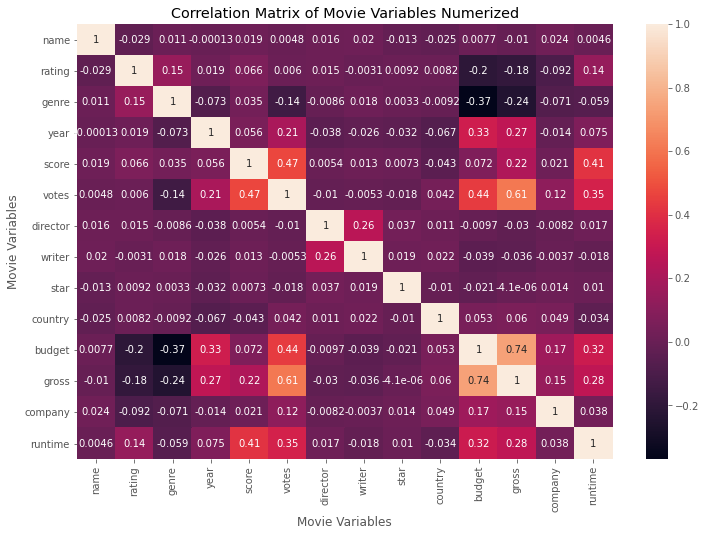

In [132]:
# Plotting the new numerized dataframe.
# This visual will have more detail. It is clear to me that gross and votes have the second highest correlation, followed by 
# scores and votes. 

correlation_matrix = df_numerized.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Movie Variables Numerized')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

In [101]:
# Here is the correlation as a table
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029370,0.010585,-0.000134,0.019283,0.004792,0.016063,0.019621,-0.013372,-0.025229,0.007664,-0.009956,0.024068,0.004559
rating,-0.029370,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010585,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,-0.000134,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
score,0.019283,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.004792,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.016063,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.019621,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.013372,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,-0.025229,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


In [134]:
# If I wanted to find the highest correlation the fastest, I can use something called unstacking
# followed by using sort_values in descending order and filtering out the 1's because I dont need
# to see the variables correlated with itself
# As I have already discovered, Budget and gross have the highest correlation followed by votes and gross, and then
# scores and votes.

correlation_matrix2 = df_numerized.corr()

correlation_pairs = correlation_matrix2.unstack()

sorted_corr_pairs = correlation_pairs.sort_values(ascending=False)

sorted_corr_pairs = sorted_corr_pairs[(sorted_corr_pairs) != 1]

sorted_corr_pairs = sorted_corr_pairs.drop_duplicates()

sorted_corr_pairs

budget    gross       0.740247
votes     gross       0.614751
score     votes       0.474256
budget    votes       0.439675
runtime   score       0.414068
votes     runtime     0.352303
year      budget      0.327722
budget    runtime     0.318695
runtime   gross       0.275796
year      gross       0.274321
director  writer      0.261735
score     gross       0.222556
votes     year        0.206021
company   budget      0.170235
gross     company     0.149553
rating    genre       0.147796
          runtime     0.140792
votes     company     0.118470
runtime   year        0.075077
budget    score       0.072001
score     rating      0.065983
gross     country     0.060078
score     year        0.056386
country   budget      0.052977
          company     0.048569
votes     country     0.041551
company   runtime     0.037585
star      director    0.036593
score     genre       0.035106
company   name        0.024068
writer    country     0.022488
score     company     0.020656
name    